#**Задача 6.2**
В городе Н. правительство решило начать борьбу с превышениями скорости автомобилей. Для выбора стратегии борьбы оно сначала решило провести исследования касательно того, влияет ли используемый водителем автомобиль на среднюю скорость передвижения.

Для этого было сформировано 3 выборки по 20 человек, в каждой из которой людям выдали одинаковые автомобили марок Mitsubishi, Audi и BMW, соответственно. В течение месяца замерялась средняя скорость каждого из автомобилей ([см. файл](https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/gov.csv)).

Каждая из пар групп была проверена двувыборочным критерием на равенство распределений, также была проведена поправка на множественность гипотез.

Требуется:

1. Описать, в чём недостаток подхода правительства.
2. Предложить метод для более корректного решения задачи.
3. Записать формальное условие задачи.
Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановки численных значений в финальную формулу)



---

#Решение
1. Недостаток подхода правительства заключается в том, что выборка не является репрезентативной и не учитывает множество факторов, которые также могут влиять на среднюю скорость передвижения, такие как:

  * Условия дороги (погода, пробки, ширина дороги и т.д.);
  * Характеристики водителей (опыт управления автомобилем, возраст, пол);
  * Социально-экономический статус водителей и др.
2. Для более корректного решения задачи можно использовать метод анализа дисперсии (ANOVA) с учётом всех факторов, описанных выше. Это позволит выявить, как каждый из факторов влияет на среднюю скорость передвижения и определить самый важный фактор.

3. Формальное условие задачи:

  $H_0$: марка автомобиля не влияет на среднюю скорость передвижения

  $H_1$: марка автомобиля влияет на среднюю скорость передвижения


Чисто для интереса посмотрим на данные, представив, что остальные факторы не оказывают существенного влияния (т.к. у нас нет этих данных), т.е. проведем однофакторный анализ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from statsmodels.stats.weightstats  import ttest_ind

In [3]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 12
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 32
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['figure.figsize'] = (8.0, 6.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 13

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/gov.csv', delimiter='\,')
data.head(20)

<ipython-input-21-34da683808d7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/gov.csv', delimiter='\,')


,mitsubishi,audi,bmw
0,51,40,106
1,67,77,78
2,33,66,78
3,140,84,95
4,96,59,87
5,87,79,71
6,66,101,89
7,81,54,83
8,80,76,51
9,21,82,81


Переделаем данные в нужный формат для анализа

In [25]:
# sample = np.concatenate((data['mitsubishi'], data['audi'], data['bmw']), axis=0)
# sample
data_post = pd.DataFrame(({'velocity': np.concatenate((data['mitsubishi'], data['audi'], data['bmw']), axis=0), 'model': ['mitsubishi']*20 + ['audi']*20 + ['bmw']*20}))
data_post.sample(15, random_state=42)

,velocity,model
0,51,mitsubishi
5,87,mitsubishi
36,84,audi
45,71,bmw
13,44,mitsubishi
54,100,bmw
33,64,audi
48,51,bmw
12,82,mitsubishi
57,75,bmw


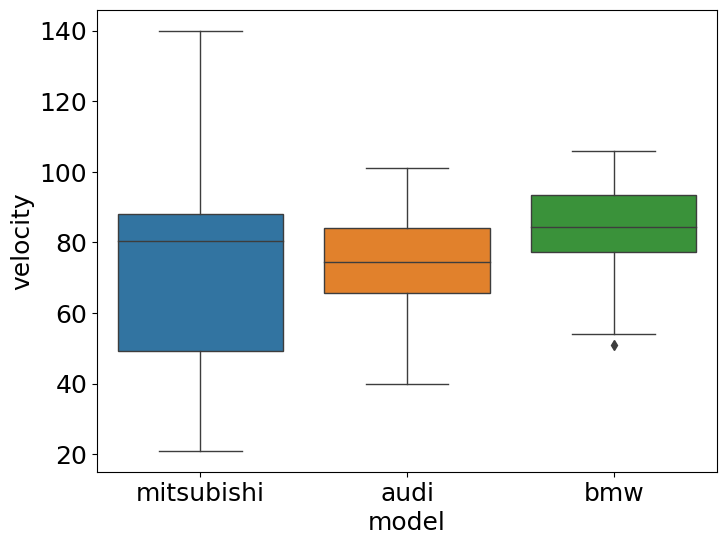

In [27]:
sns.boxplot(x="model", y="velocity", data=data_post)
plt.show()